画像を正常にロードしました: ../../T1/T1.nii.gz
画像データ形状: (164, 227, 181)
画像ヘッダー情報: 1

--- スライスビュー（デフォルト）---


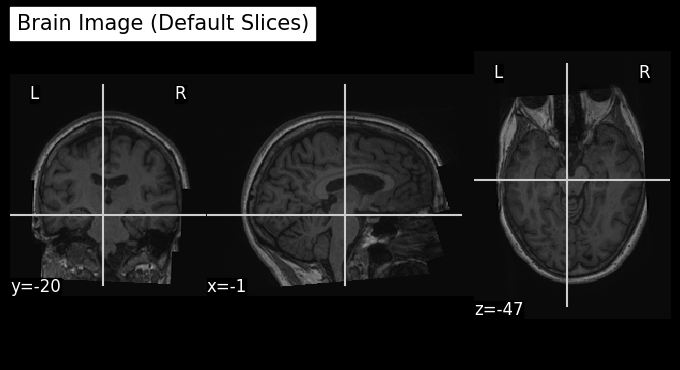


--- スライスビュー（複合軸）---


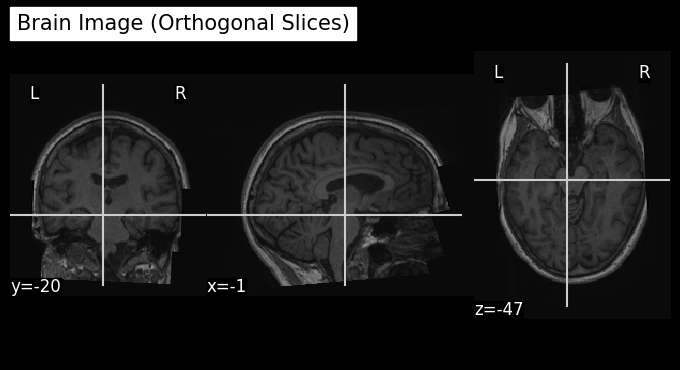


--- スライスビュー（カラーマップ変更）---


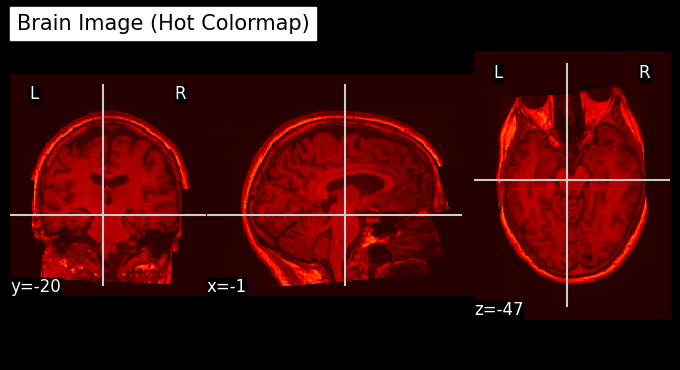


--- スライスビュー（複数のカット位置）---


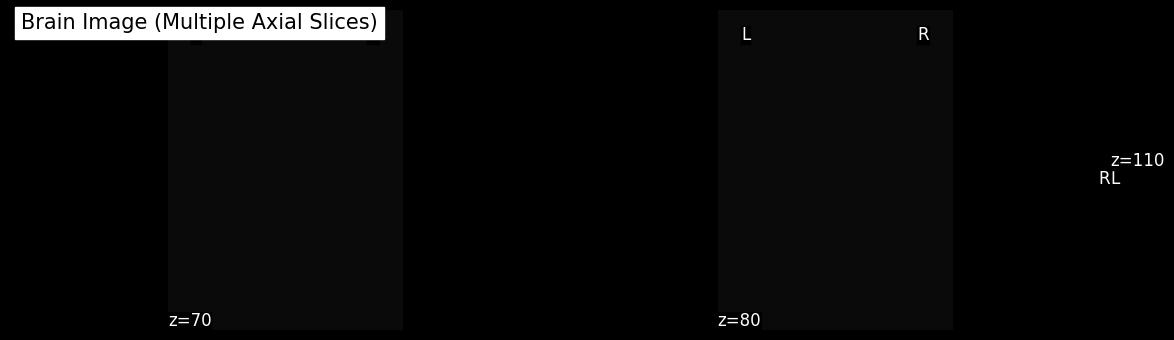


可視化が完了しました。


In [3]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import os

# --- 1. nii.gz ファイルのパスを指定 ---
# ここに可視化したい nii.gz ファイルのパスを入力してください。
# 例: 'path/to/your/brain_image.nii.gz'
# 適切なファイルがない場合は、nilearnのサンプルデータを使用することもできます。
sample_nii_gz_file = "../../T1/T1.nii.gz"
# もしテスト用のファイルがない場合、nilearnのdatasetsからサンプルデータをダウンロードして使用できます。
# from nilearn import datasets
# atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# sample_nii_gz_file = atlas.maps # ハーバード・オックスフォード皮質アトラスの地図ファイル

if not os.path.exists(sample_nii_gz_file):
    print(f"指定されたファイルが見つかりません: {sample_nii_gz_file}")
    print("nilearnのサンプルデータを使用します。")
    # 代替として、nilearnのMNIテンプレートを使用する
    from nilearn import image
    # MNI152 T1テンプレート画像をダウンロードして使用
    mni_template = image.fetch_img_data(datasets.fetch_mni_template().anat)
    sample_nii_gz_file = mni_template
    print(f"代わりにnilearnのMNIテンプレートを使用します: {sample_nii_gz_file}")


# --- 2. 脳画像をロード ---
# nibabelを使ってnii.gzファイルをロードします。
# nilearnのplotting関数はnibabelのImageオブジェクトを直接受け取ります。
try:
    img = nib.load(sample_nii_gz_file)
    print(f"画像を正常にロードしました: {sample_nii_gz_file}")
    print(f"画像データ形状: {img.shape}")
    print(f"画像ヘッダー情報: {img.header['qform_code']}")
except FileNotFoundError:
    print(f"エラー: ファイル '{sample_nii_gz_file}' が見つかりません。パスを確認してください。")
    exit()
except Exception as e:
    print(f"画像のロード中にエラーが発生しました: {e}")
    exit()

# --- 3. 脳画像を可視化 ---

# a) スライスビューで表示（デフォルトの軸）
print("\n--- スライスビュー（デフォルト）---")
plotting.plot_anat(img, title="Brain Image (Default Slices)")
plt.show()

# b) 特定の軸（axial, coronal, sagittal）で表示
# print("\n--- スライスビュー（特定軸）---")
# plotting.plot_anat(img, display_mode='axial', title="Brain Image (Axial Slices)")
# plt.show()

# plotting.plot_anat(img, display_mode='coronal', title="Brain Image (Coronal Slices)")
# plt.show()

# plotting.plot_anat(img, display_mode='sagittal', title="Brain Image (Sagittal Slices)")
# plt.show()

# c) 複数の軸を一度に表示
print("\n--- スライスビュー（複合軸）---")
plotting.plot_anat(img, display_mode='ortho', title="Brain Image (Orthogonal Slices)")
plt.show()

# d) カット位置を調整
# cut_coords には各軸の表示位置（M N I 座標）を指定します。
# img.shape を見て、データがどの方向を向いているか確認し、適切な値を設定してください。
# ここでは、画像の中心付近を自動的に計算させます。
# print("\n--- スライスビュー（カット位置調整）---")
# # plotting.find_cut_slices は自動的に最適なカット位置を見つけます。
# cut_coords = plotting.find_cut_slices(img)
# plotting.plot_anat(img, display_mode='ortho', cut_coords=cut_coords, title="Brain Image (Adjusted Cut Coords)")
# plt.show()

# e) カラーマップの変更 (fMRIデータなどの場合により有効)
# 通常、解剖学的画像にはグレースケールが使用されますが、カラーマップを変更することも可能です。
print("\n--- スライスビュー（カラーマップ変更）---")
plotting.plot_anat(img, display_mode='ortho', cmap='hot', title="Brain Image (Hot Colormap)")
plt.show()

# f) スライス数を増やす（複数のスライスを表示）
# plot_anatは通常、少数のスライスを表示しますが、より多くのスライスを表示したい場合は、
# plot_anatのオプションを調整するか、他の関数を検討する必要があります。
# しかし、ここでは基本的なplot_anatの範囲で説明します。
# cut_coords をリストで与えることで、複数のスライスを表示できます。
print("\n--- スライスビュー（複数のカット位置）---")
# 例: axial方向で複数のスライスを表示
# データの範囲を考慮して適切な値を設定してください
# img.shape[2] がZ軸のサイズだと仮定
num_slices = 5
z_center = img.shape[2] // 2
axial_cuts = [z_center - 20, z_center - 10, z_center, z_center + 10, z_center + 20]
plotting.plot_anat(img, display_mode='z', cut_coords=axial_cuts, title="Brain Image (Multiple Axial Slices)")
plt.show()


# --- 4. 3D レンダリング（より高度な可視化）---
# plot_anatはスライスビューですが、nilearnにはサーフェスレンダリングも可能です。
# ただし、これには脳のサーフェスデータ（.giiファイルなど）が必要です。
# 例: MNIテンプレートのサーフェスデータをロードして、サーフェス上に画像をプロット
# from nilearn import datasets
# fsaverage = datasets.fetch_surf_fsaverage()
# surf_mesh = fsaverage.pial_right # 右脳の軟膜表面
#
# plotting.plot_surf(surf_mesh, bg_map=img, title="Brain Surface Plot with Anatomical Image")
# plt.show()
#
# 注意: 上記のサーフェスレンダリングは、`nilearn`の`plot_surf`関数を使用し、
# 画像データとサーフェスモデルが適切にアライメントされている必要があります。
# また、サーフェスプロットはWebブラウザでインタラクティブに表示されることが多いです。


print("\n可視化が完了しました。")